# Linear regression using Tensor Flow

Reuse the same model as in previous workbook
Reference:
https://databricks.com/tensorflow/training-and-convergence

In [1]:
import tensorflow as tf
import numpy as np
import pandas
from sklearn import metrics
import matplotlib.pyplot as plt

## Univariate

### Data model

In [2]:
def generateBatch(N, stochastic = False):
    #
    xMin = 0
    xMax = 0.5
    #
    b = 0.35
    std = 0.01
    #
    if stochastic:
        x = np.random.uniform(xMin, xMax, N)
    else:
        x = np.linspace(xMin, xMax, N)
    yClean = x**4 + (x-0.3)**3 + b
    y =  yClean + np.random.normal(0, std, N) 
    return (x, y, yClean)

#### Test data

In [3]:
Ntest = 100000
(xTest, yTest1, yTestClean1) = generateBatch(Ntest)

### Training model

In [4]:
# x and y are placeholders for our training data
x = tf.placeholder("float")
y = tf.placeholder("float")

In [5]:
# Initial weights
w1 = tf.Variable([1.0, 1.0], name="w1")
# Our model of y = a*x + b
y_model1 = tf.multiply(x, w1[1]) + w1[0]
# Our error is defined as the square of the differences
error = tf.losses.mean_squared_error(y, y_model1)
# Batch size
Nbatch = 100

W0717 16:25:01.065466 140735793488768 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Gradient descent optimizer

In [6]:
# The Gradient Descent Optimizer does the heavy lifting
train_op1 = tf.train.GradientDescentOptimizer(0.01).minimize(error)
# Stop threshold on MSE
threshold = 1e-4
# Initialize values, create a session and run the model
model = tf.global_variables_initializer()
mse = 1
wLearn = [];
with tf.Session() as session:
    session.run(model)
    while mse > threshold:
        (x_value, y_value, yClean) = generateBatch(Nbatch)
        _, mse, w = session.run([train_op1, error, w1], feed_dict={x: x_value, y: y_value})
        wLearn.append(np.concatenate((w, [mse])))
        
    print("Predicted model: {a:.3f} x + {b:.3f}, num iteration={c}".format(a=w[1], b=w[0], c=len(wLearn)))
df1 = pandas.DataFrame(wLearn, columns = ('w0', 'w1', 'MSE'))

Predicted model: 0.166 x + 0.318, num iteration=8786


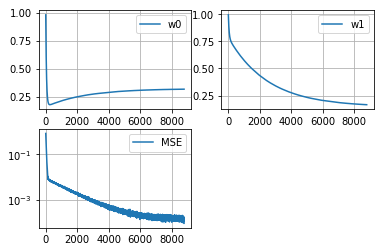

In [7]:
plt.subplot(2,2,1)
plt.plot(df1['w0'])
plt.grid()
plt.legend();
plt.subplot(2,2,2)
plt.plot(df1['w1'])
plt.grid()
plt.legend();
plt.subplot(2,2,3)
plt.semilogy(df1['MSE'])
plt.grid()
plt.legend();

#### Test model 

In [8]:
yEst1 = w[1]*xTest + w[0]

mse1 = 0.00015760683084400261


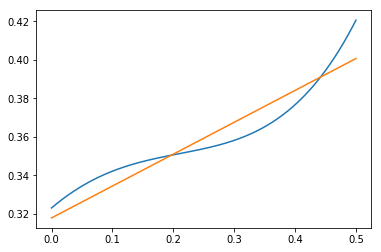

In [9]:
plt.plot(xTest, yTestClean1, xTest, yEst1);
mse1 = metrics.mean_squared_error(yTest1, yEst1)
print('mse1 =', mse1);

### Moment optimizer

In [10]:
# The Gradient Descent Optimizer does the heavy lifting
train_op2 = tf.train.MomentumOptimizer(0.05, 0.5).minimize(error)
# Stop threshold on MSE
threshold = 1e-4
# Initialize values, create a session and run the model
model = tf.global_variables_initializer()
mse = 1
wLearn = [];
with tf.Session() as session:
    session.run(model)
    while mse > 1e-4:
        (x_value, y_value, yClean) = generateBatch(Nbatch)
        _, mse, w = session.run([train_op2, error, w1], feed_dict={x: x_value, y: y_value})
        wLearn.append(np.concatenate((w, [mse])))
        
    print("Predicted model: {a:.3f} x + {b:.3f}, num iteration={c}".format(a=w[1], b=w[0], c=len(wLearn)))
df2 = pandas.DataFrame(wLearn, columns = ('w0', 'w1', 'MSE'))

Predicted model: 0.153 x + 0.320, num iteration=1140


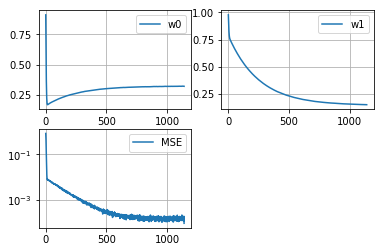

In [11]:
plt.subplot(2,2,1)
plt.plot(df2['w0'])
plt.grid()
plt.legend();
plt.subplot(2,2,2)
plt.plot(df2['w1'])
plt.grid()
plt.legend();
plt.subplot(2,2,3)
plt.semilogy(df2['MSE'])
plt.grid()
plt.legend();

In [12]:
yEst2 = w[1]*xTest + w[0]

mse1 = 0.00015760683084400261


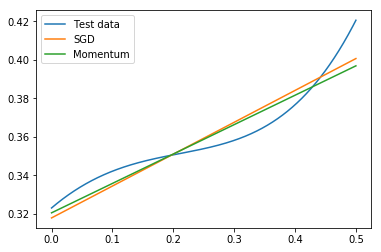

In [13]:
plt.plot(xTest, yTestClean1, xTest, yEst1, xTest, yEst2);
plt.legend(('Test data', 'SGD', 'Momentum'))
mse1 = metrics.mean_squared_error(yTest1, yEst1)
print('mse1 =', mse1);

### Adam optimizer

https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer

http://arxiv.org/pdf/1412.6980.pdf

In [14]:
# The Gradient Descent Optimizer does the heavy lifting
train_op3 = tf.train.AdamOptimizer(0.01, 0.1).minimize(error)
# Stop threshold on MSE
threshold = 1e-4
# Initialize values, create a session and run the model
model = tf.global_variables_initializer()
mse = 1
wLearn = [];
with tf.Session() as session:
    session.run(model)
    while mse > 1e-4:
        (x_value, y_value, yClean) = generateBatch(Nbatch)
        _, mse, w = session.run([train_op3, error, w1], feed_dict={x: x_value, y: y_value})
        wLearn.append(np.concatenate((w, [mse])))
        
    print("Predicted model: {a:.3f} x + {b:.3f}, num iteration={c}".format(a=w[1], b=w[0], c=len(wLearn)))
df3 = pandas.DataFrame(wLearn, columns = ('w0', 'w1', 'MSE'))

Predicted model: 0.149 x + 0.322, num iteration=1160


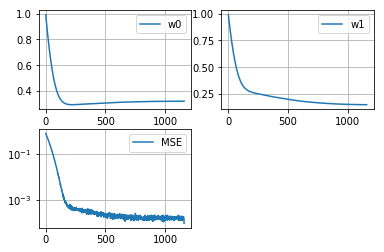

In [15]:
plt.subplot(2,2,1)
plt.plot(df3['w0'])
plt.grid()
plt.legend();
plt.subplot(2,2,2)
plt.plot(df3['w1'])
plt.grid()
plt.legend();
plt.subplot(2,2,3)
plt.semilogy(df3['MSE'])
plt.grid()
plt.legend();

There is a clear gain compared to the standard and momentum gradient descent : 
- Less iterations
- Less undershoot on w0
- Clear convergence of the MSE to the noise floor


In [16]:
yEst3 = w[1]*xTest + w[0]

mse1 = 0.00015760683084400261


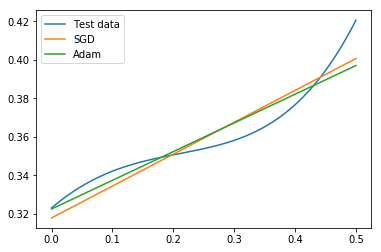

In [17]:
plt.plot(xTest, yTestClean1, xTest, yEst1, xTest, yEst3);
plt.legend(('Test data', 'SGD', 'Adam'))
mse1 = metrics.mean_squared_error(yTest1, yEst1)
print('mse1 =', mse1);